# Easy Classification Model using FastAI

## Let's try to identify wolf or husky images in an easy way. 

In [1]:
# We import required lib's
from fastai.vision import *
import os

In [2]:
# nothing in our folder yet
print(os.listdir("../working"))

['__notebook__.ipynb', '__output__.json']


In [3]:
# move images to working folder
!mkdir ../working/dog
!mkdir ../working/wolf
!cp ../input/dog-v1/* ../working/dog
!cp ../input/wolf-v1/* ../working/wolf

In [4]:
# let's check
print(os.listdir("../working"))

['dog', '__notebook__.ipynb', '__output__.json', 'wolf']


Then we can remove any images that can't be opened:

In [5]:
verify_images('../working/wolf', delete=True, max_size=500)
verify_images('../working/dog', delete=True, max_size=500)

## View data

In [6]:
classes = ['wolf','dog']
np.random.seed(42)
data = ImageDataBunch.from_folder('../working', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [7]:
data.classes

['dog', 'wolf']

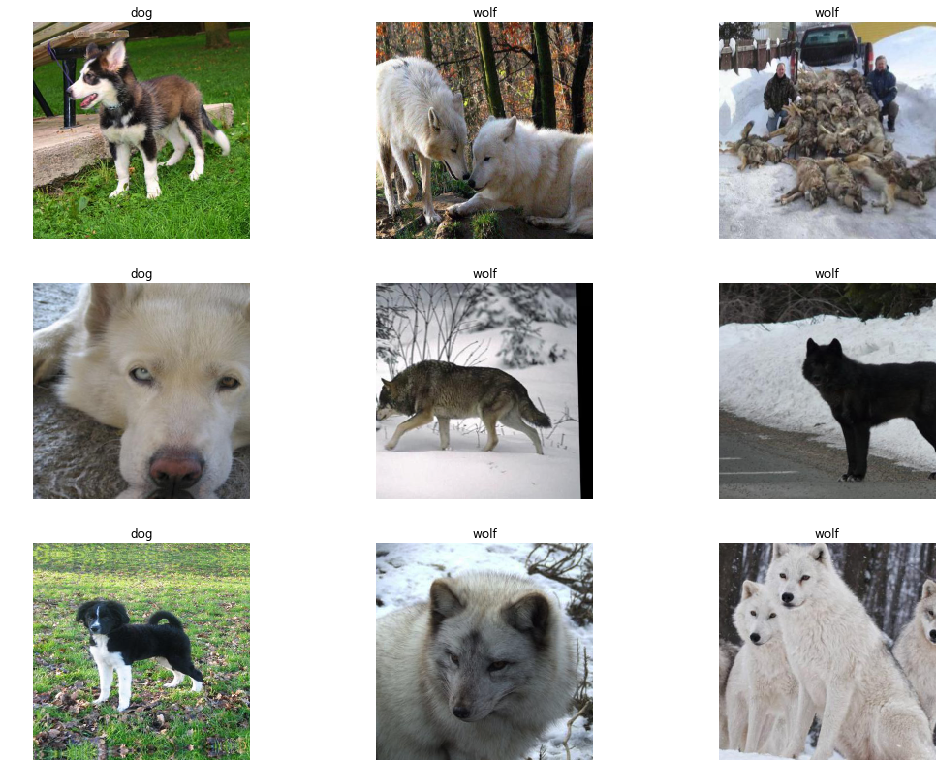

In [8]:
data.show_batch(rows=3, figsize=(15,11))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dog', 'wolf'], 2, 78, 19)

## Train model

In [10]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 94303142.96it/s]


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.018249,0.701271,0.421053
2,0.963609,0.280543,0.052632
3,0.751839,0.193390,0.052632
4,0.586905,0.169192,0.052632


In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.63E-05


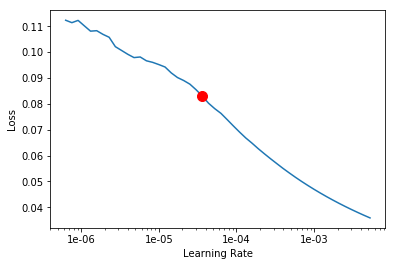

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.071284,0.162847,0.052632
2,0.110976,0.135844,0.052632


In [17]:
learn.save('stage-2')

## Interpretation

In [18]:
learn.load('stage-2');

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

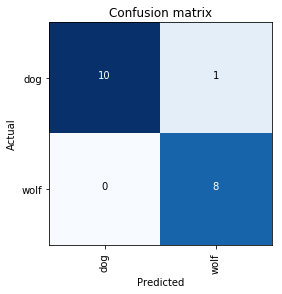

In [20]:
interp.plot_confusion_matrix()

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

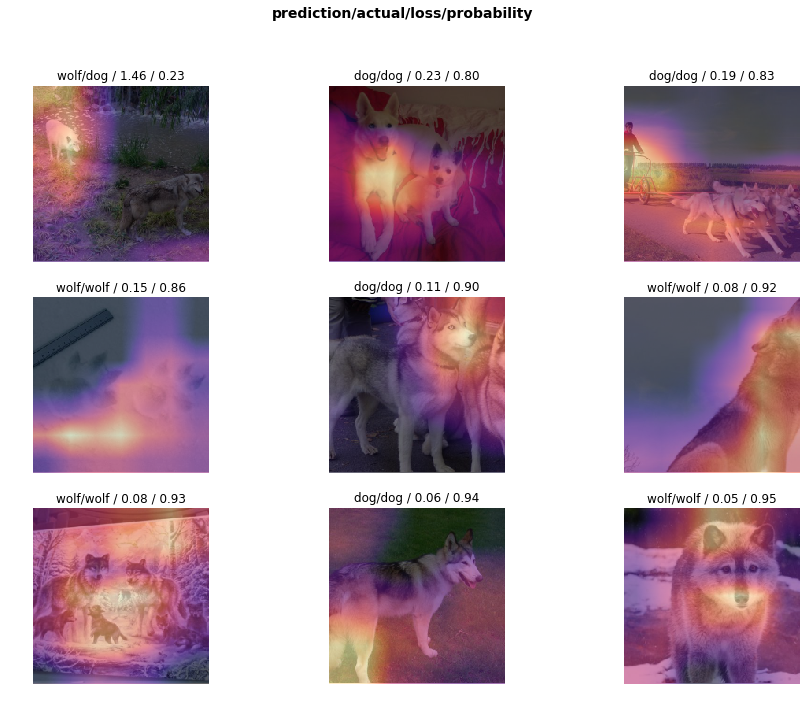

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

# Look at the images...
# Is there something wrong ?

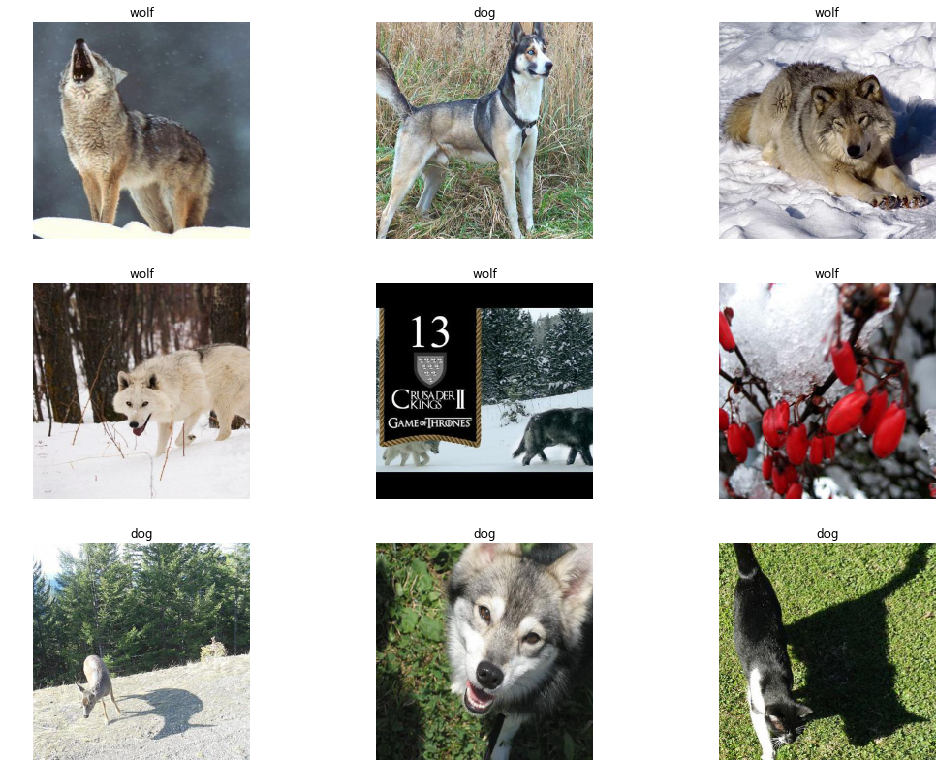

In [23]:
data.show_batch(rows=3, figsize=(15,11))

# More info are published in §6.4 of this publication: https://www.kdd.org/kdd2016/papers/files/rfp0573-ribeiroA.pdf
